### CH3 數據資料的儲存與讀取
### 3.1 檔案的讀寫
### 3.2 csv資料的讀寫與輸入
### 3.3 json資料的儲存與讀取
### 3.4 Excel資料儲存與讀取
### 3.5 SQLite資料庫的操作
### 3.6 MySQL資料庫的操作
### 3.7 Google試算表的操作

### 3.1 檔案的讀寫
    以with開檔
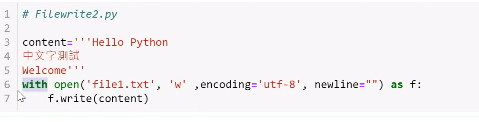

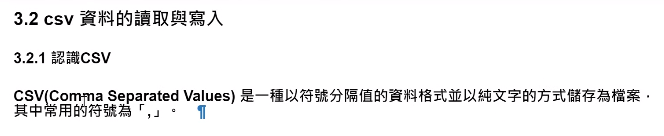
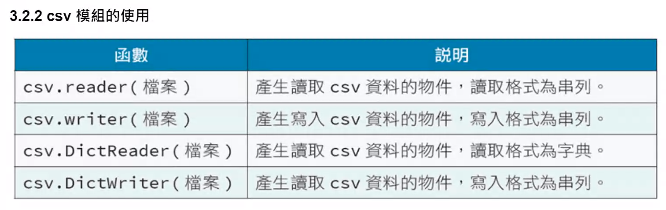
    勘誤:csv.DictWriter:產生寫入csv資料物件 寫入格式為字典

In [4]:
import csv
with open('school.csv',newline='',encoding="UTF-8") as csvfile:
    rows=csv.reader(csvfile)
    for row in rows:
        print(row)

['座號', '姓名', '國文', '英文', '數學']
['1', '葉大熊', '65', '62', '40']
['2', '陳靜文', '85', '90', '97']
['3', '王聰明', '92', '90', '95']


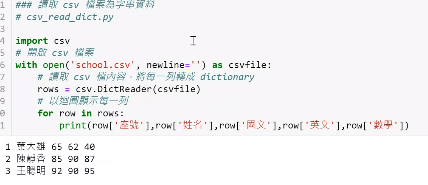

In [7]:
import csv
with open('school.csv',newline='',encoding="UTF-8") as csvfile:
    rows=csv.DictReader(csvfile)
    for row in rows:
        print(row["座號"],row["姓名"],row["國文"],row["英文"],row["數學"])

1 葉大熊 65 62 40
2 陳靜文 85 90 97
3 王聰明 92 90 95


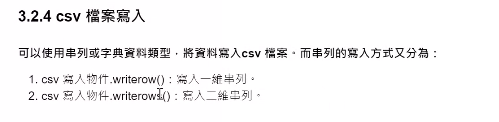
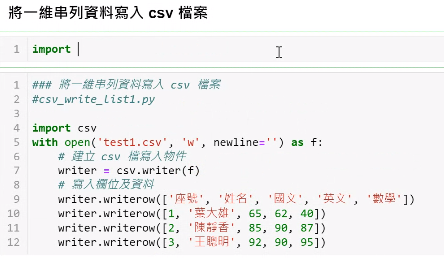

In [11]:
import csv
with open("test1.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerow(["座號","姓名","國文","英文","數學"])
    writer.writerow([1,"葉大熊",65,62,40])
    writer.writerow([2,"陳靜文",85,90,97])
    writer.writerow([3,"王聰明",92,90,95])

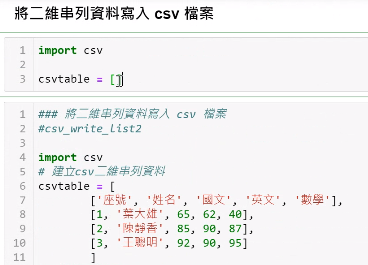

In [10]:
import csv
csvtable=[["座號","姓名","國文","英文","數學"],
          [1,"葉大熊",65,62,40],
          [2,"陳靜文",85,90,97],
          [3,"王聰明",92,90,95]]
with open("test2.csv","w",newline="") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerows(csvtable)

    將字典資料寫入csv檔案
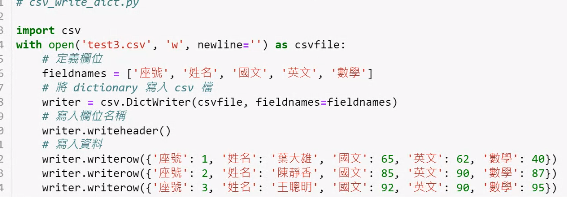

In [13]:
import csv
with open("test3.csv","w",newline="") as csvfile:
    fieldnames=["座號","姓名","國文","英文","數學"]
    writer=csv.DictWriter(csvfile,fieldnames=fieldnames)
    writer.writeheader()
    writer.writerow({"座號":1,"姓名":"葉大熊","國文":65,"英文":62,"數學":40})
    writer.writerow({"座號":2,"姓名":"陳靜香","國文":85,"英文":90,"數學":70})
    writer.writerow({"座號":3,"姓名":"王聰明","國文":92,"英文":95,"數學":97})

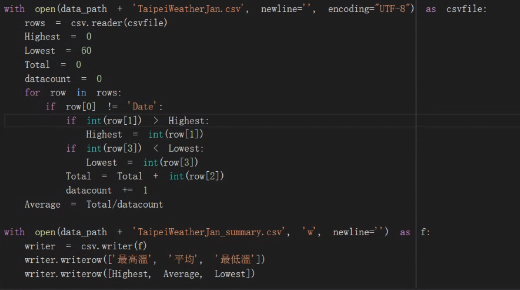
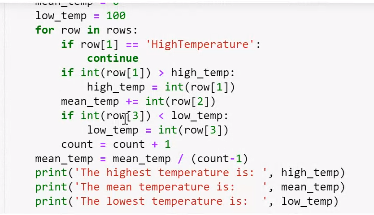
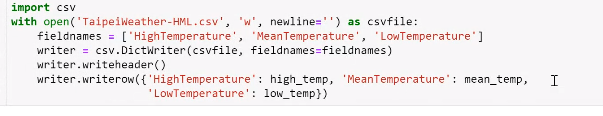

In [ ]:
import csv
with open('TaipeiWeatherJan.csv',newline='',encoding="UTF-8") as csvfile:
    rows=csv.reader(csvfile)
    highest=0
    lowest=100
    total=0
    datacount=0  
    for row in rows:
        if row[0]=="Data":
            continue
            if int(row[1])>highest:
                highest=int(row[1])
            if int(row[3])<lowest:
                lowest=int(row[3])
            total=total+int(row[2])
            datacount=datacount+1
    average=total/(datacount-1)  
       
   
with open('TaipeiWeatherJan_SUM.csv',newline='',encoding="UTF-8") as f:    
    writer=csv.writer(f)
    writer.writerow(["最高溫","平均溫","最低溫"])
    writer.writerow([highest,average,lowest])

### 3.3 json資料的儲存與讀取
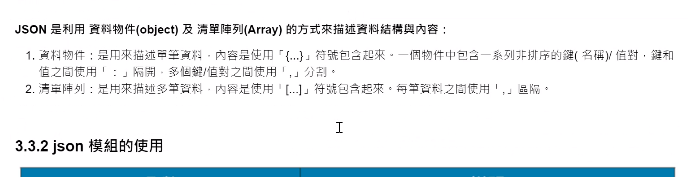
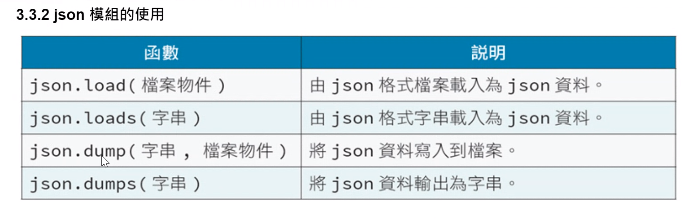

In [26]:
import json

class_str="""
{
"一年甲班":[{"座號":1,
             "姓名":"葉大雄",
             "國文":65,
             "英文":90,
             "數學":70},
           {"座號":2,
             "姓名":"陳靜香",
             "國文":80,
             "英文":92,
             "數學":80},
           {"座號":3,
             "姓名":"王聰明",
             "國文":87,
             "英文":63,
             "數學":93}]
}
"""

datas=json.loads(class_str)
print(type(datas))
for data in datas["一年甲班"]:
    print(data["姓名"])

<class 'dict'>
葉大雄
陳靜香
王聰明


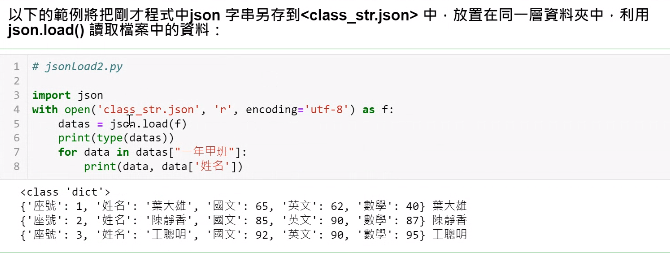

In [ ]:
import json
with open("class.json","r",encoding="utf-8") as f:
    datas=json.load(f)
    print(type(datas))
    for data in datas["一年甲班"]:
        print(data)

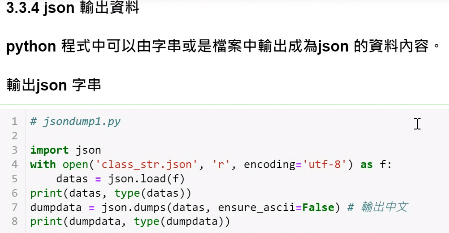

In [ ]:
import json
with open("class.json","r",encoding="utf-8") as f:
    datas=json.load(f)
print(datas,type(datas))
dumpdata=json.dump(datas,ensurr_ascil=False)
print(dumpdata,type(dumpdata))

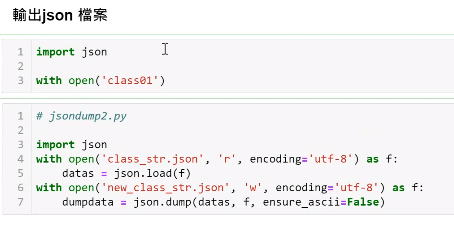

In [ ]:
import json
with open("class.json","r",encoding="utf-8") as f:
    datas=json.load(f)
with open("new_class.json","r",encoding="utf-8") as f:
    dumpdata=json.dump(datas,f,ensurr_ascil=False)

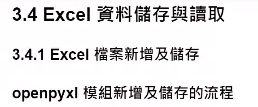
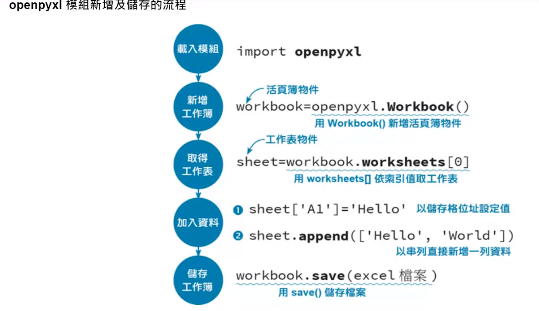

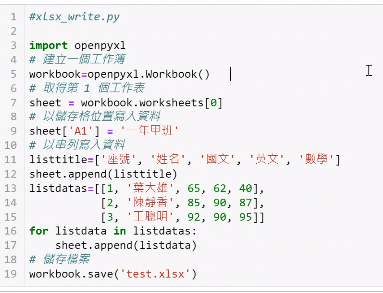

In [36]:
import openpyxl
workbook=openpyxl.Workbook()
sheet=workbook.worksheets[0]
sheet["A1"]="一年甲班"
listtitle=["座號","姓名","國文","英文","數學"]
sheet.append(listtitle)
listdatas=[[1,"葉大熊",65,62,40],
          [2,"陳靜文",85,90,97],
          [3,"王聰明",92,90,95]]
for listdata in listdatas:
    sheet.append(listdata)
workbook.save("test.xlsx")

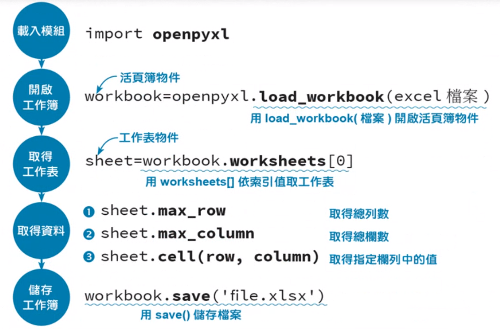
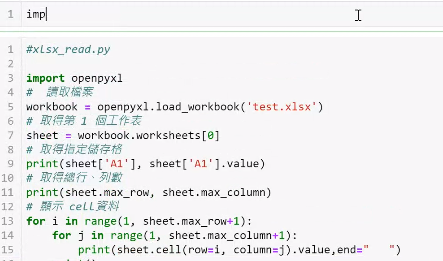
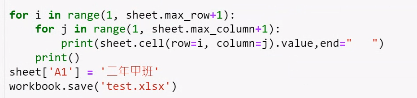

In [45]:
import openpyxl
workbook=openpyxl.load_workbook("test.xlsx")
sheet=workbook.worksheets[0]
print(sheet["A1"],sheet["A1"].value)
print(sheet.max_row,sheet.max_column)
for i in range(1,sheet.max_row):
    for j in range(1,sheet.max_column):
        print(sheet.cell(row=i,column=j).value,end="\t")
    print()
sheet["A1"]="二年甲班"
workbook.save("test.xlsx")


<Cell 'Sheet'.A1> 一年甲班
5 5
一年甲班	None	None	None	
座號	姓名	國文	英文	
1	葉大熊	65	62	
2	陳靜文	85	90	


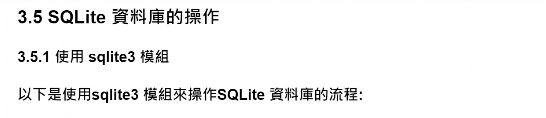
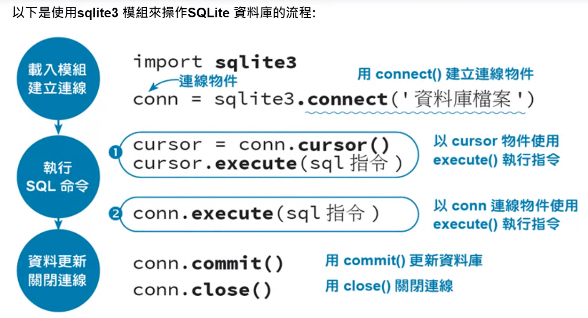

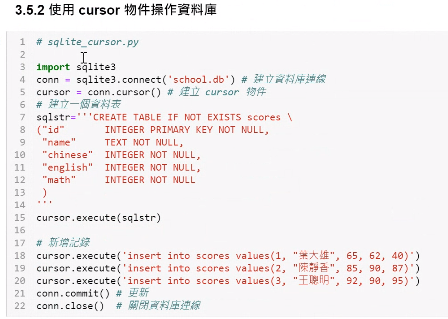

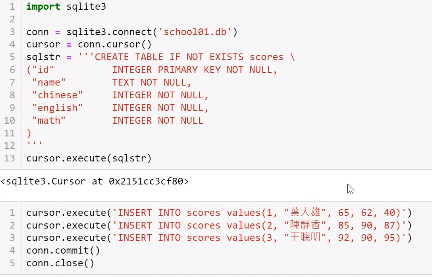

    DB Browser for SQLite下載網址:https://sqlitebrowser.org/

In [50]:
import sqlite3
conn=sqlite3.connect("school.db")
cursor=conn.cursor()
sqlstr="""CREATE TABLE IF NOT EXISTS scores \
("id"        INTEGER PRIMARY KEY NOT NULL,
 "name"      TEXT NOT NULL,
 "chinese"   INTERGER NOT NULL,
 "english"   INTERGER NOT NULL,
 "math"      INTERGER NOT NULL
 )
"""
cursor.execute(sqlstr)

cursor.execute("INSERT INTO scores values(1,'葉大雄',65,62,70)")
cursor.execute("INSERT INTO scores values(2,'陳靜香',85,90,87)")
cursor.execute("INSERT INTO scores values(3,'王聰明',92,90,60)")
conn.commit()
conn.close()

In [51]:
import sqlite3
conn=sqlite3.connect("school.db")
cursor=conn.cursor()
cursor.execute("INSERT INTO scores values(4,'John',70,80,90)")
cursor.execute("INSERT INTO scores values(5,'Helen',85,95,75)")
cursor.execute("INSERT INTO scores values(6,'Tom',72,92,60)")
conn.commit()
conn.close()

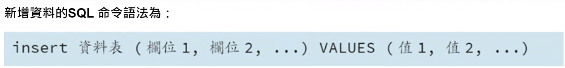
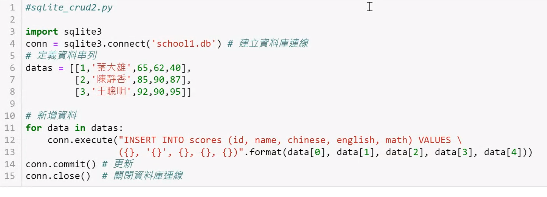

In [ ]:
import sqlite3
conn=sqlite3.connect("school.db")
datas=[[7,'葉大雄',65,62,70],
       [8,'陳靜香',85,90,87],
       [9,'王聰明',92,90,60]]
for data in datas:
    conn.execute("INSERT INTO scores (id,name,chinese,english,math) VALUES({},'{}',{},{},{})".format(data[0],data[1],data[2],data[3],data[4]))
conn.commit()
conn.close()

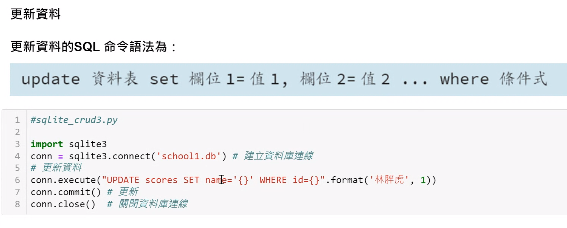

In [57]:
import sqlite3
conn=sqlite3.connect("school.db")
conn.execute("UPDATE scores SET name='{}' WHERE id={}".format('林胖虎',1))
conn.commit()
conn.close()

In [60]:
import sqlite3
conn=sqlite3.connect("school.db")
conn.execute("UPDATE scores SET english={} WHERE id={}".format(90,5))
conn.commit()
conn.close()

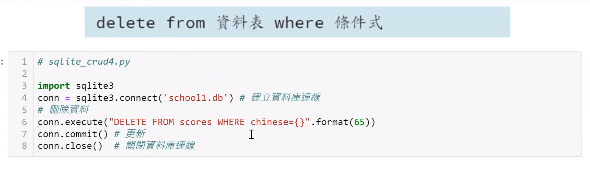

In [62]:
import sqlite3
conn=sqlite3.connect("school.db")
conn.execute("DELETE FROM scores WHERE chinese={}".format(65))
conn.commit()
conn.close()

In [63]:
import sqlite3
conn=sqlite3.connect("school.db")
conn.execute("DELETE FROM scores WHERE name='{}'".format('陳靜香'))
conn.commit()
conn.close()

In [65]:
#"" ''
print("Hello.")
print('Hello.')
print("I'm fine.")
print('This "a" is special.')

Hello.
Hello.
I'm fine.
This "a" is special.


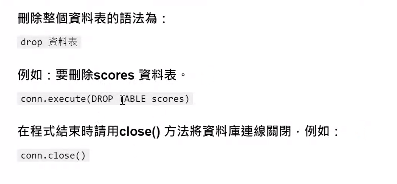

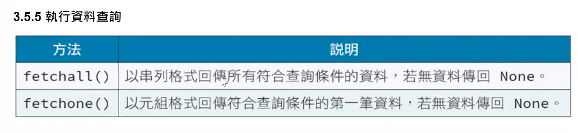

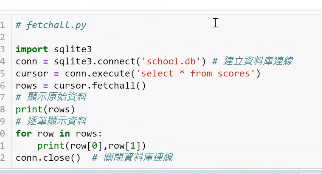

In [67]:
import sqlite3
conn=sqlite3.connect("school.db")
cursor=conn.execute("select * from scores")
rows=cursor.fetchall()
print(rows)
for row in rows:
    print(row[0],row[1])
conn.close()

[(3, '王聰明', 92, 90, 60), (4, 'John', 70, 80, 90), (5, 'Helen', 85, 90, 75), (6, 'Tom', 72, 92, 60)]
3 王聰明
4 John
5 Helen
6 Tom


In [73]:
import sqlite3
conn=sqlite3.connect("school.db")
cursor=conn.execute("select * from scores")
rows=cursor.fetchone()
print(row[0],row[1])
conn.close()

6 Tom


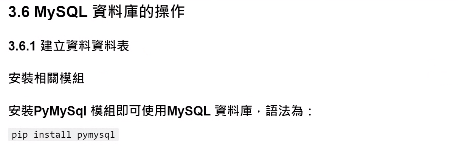

    https://www.uniformserver.com/

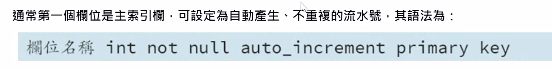

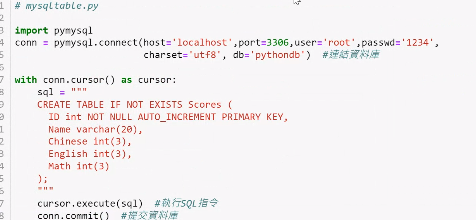

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="""
    CREATA TABLE IF NOT EXISTS scores(
      ID      int NOT NULL AUTO_INCREMENT PRIMARY KEY,
      NAME    varchar(20),
      CHINESE int(3),
      ENGLISH int(3),
      MATH    int(3)
    );
    """
    cursor.execute(sql)
    conn.commit()
conn.close()

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="""
    INSERT INTO scores (name,chinese,english,math) values
    ('葉大雄',65,62,70),
    ('陳靜香',85,90,87),
    ('王聰明',92,90,60)
    
    """
    cursor.execute(sql)
    conn.commit()
conn.close()

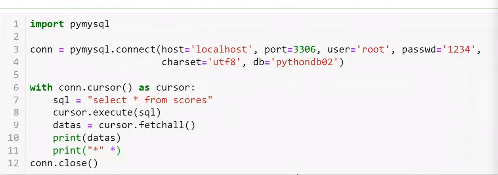

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="select * from scores"
    cursor.execute(sql)
    datas=cursor.fetchall()
    print(datas)
    print("="*30)
    sql="select * from scores"
    cursor.execute(sql)
    datas=cursor.fetchone()
    print(datas)
conn.close()

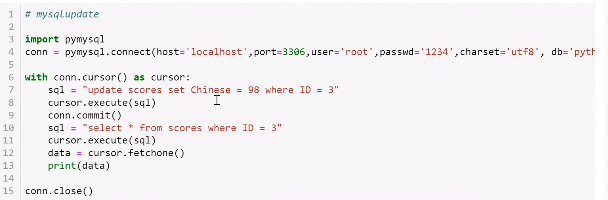

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="UPDATE scores SET chinese=98 where ID=3"
    cursor.execute(sql)
    conn.commit()
    sql="select * from scores where ID=3"
    cursor.execute(sql)
    datas=cursor.fetchone()
    print(datas)
conn.close()

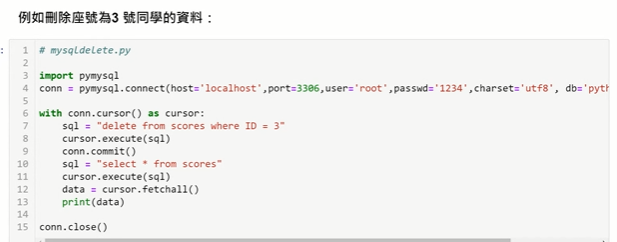

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="delete from scores where ID=3"
    cursor.execute(sql)
    conn.commit()
    sql="select * from scores"
    cursor.execute(sql)
    datas=cursor.fetchone()
    print(datas)
conn.close()

    HW: 博客來 https://www.books.com.tw/

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",\
                     charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="""
    CREATA TABLE IF NOT EXISTS scores(
      ID              int NOT NULL AUTO_INCREMENT PRIMARY KEY,
      BOOKTITLE       varchar(50),
      NAME            varchar(50),
      PUBLISHER       varchar(50),
      PUBLICATIONDATE varchar(20),
      FIXEDPRICE      int(5),
      SPECIALPRICE    int(5),
    );
    """
    cursor.execute(sql)
    conn.commit()
conn.close()

In [ ]:
import pymysql
conn=pymysql.connect(host="localhost",port=3306,user="root",passwd="1234",charset="utf8",db="pythondb01")
with conn.cursor() as cursor:
    sql="""
    INSERT INTO scores (BOOKTITLE,NAME,PUBLISHER,PUBLICATIONDATE,FIXEDPRICE,SPECIALPRICE) values
    ('心智圖歸納聯想 TOEIC必考3000字','LiveABC編輯群','希伯崙','2021/08/18',450,297),
    ('禱告時光','劉恩宏','愛的影響力','2021/11/15',220,174),
    ('法朋風味全圖鑑','李依錫','大境','2022/05/17',520,411),
    ('化物語 15','西尾維新,大暮維人','東立','2022/05/05',180,171),
    ('魔道祖師漫畫版二','落地成球,墨香銅臭','平心出版','2022/05/12',320,253),
    ('原子習慣：細微改變帶來巨大成就的實證法則','詹姆斯．克利爾','方智','2019/06/01',330,261),
    ('你發生過什麼事：關於創傷如何影響大腦與行為，以及我們能如何療癒自己','歐普拉．溫芙蕾,布魯斯．D．培理','悅知文化','2022/03/04',480,379),
    ('ONE PIECE航海王 102','尾田榮一郎','東立','2022/05/06',125,119),
    ('蛤蟆先生去看心理師','羅伯．狄保德','三采','2022/01/26',400,316),
    ('369排毒飲食聖經','安東尼．威廉','晨星','2022/05/12',499,394)
    
    """
    cursor.execute(sql)
    conn.commit()
conn.close()

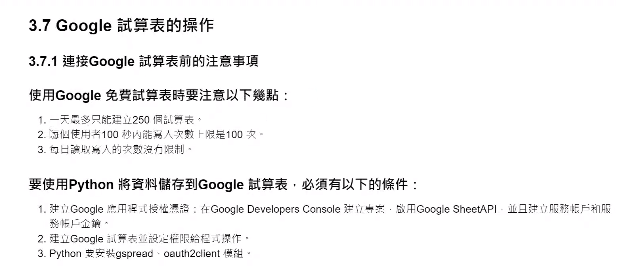

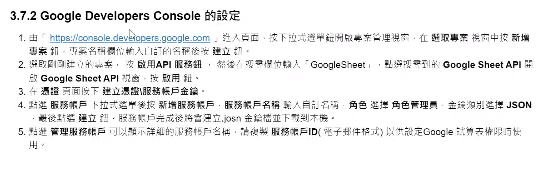